In [64]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
%matplotlib notebook

todo: 
correlation between trap size and 

## Tuned Ackley 

In [65]:
ta = tuned_ackley()

In [66]:
ta.visualise3d(lim=20, n=50)

<IPython.core.display.Javascript object>


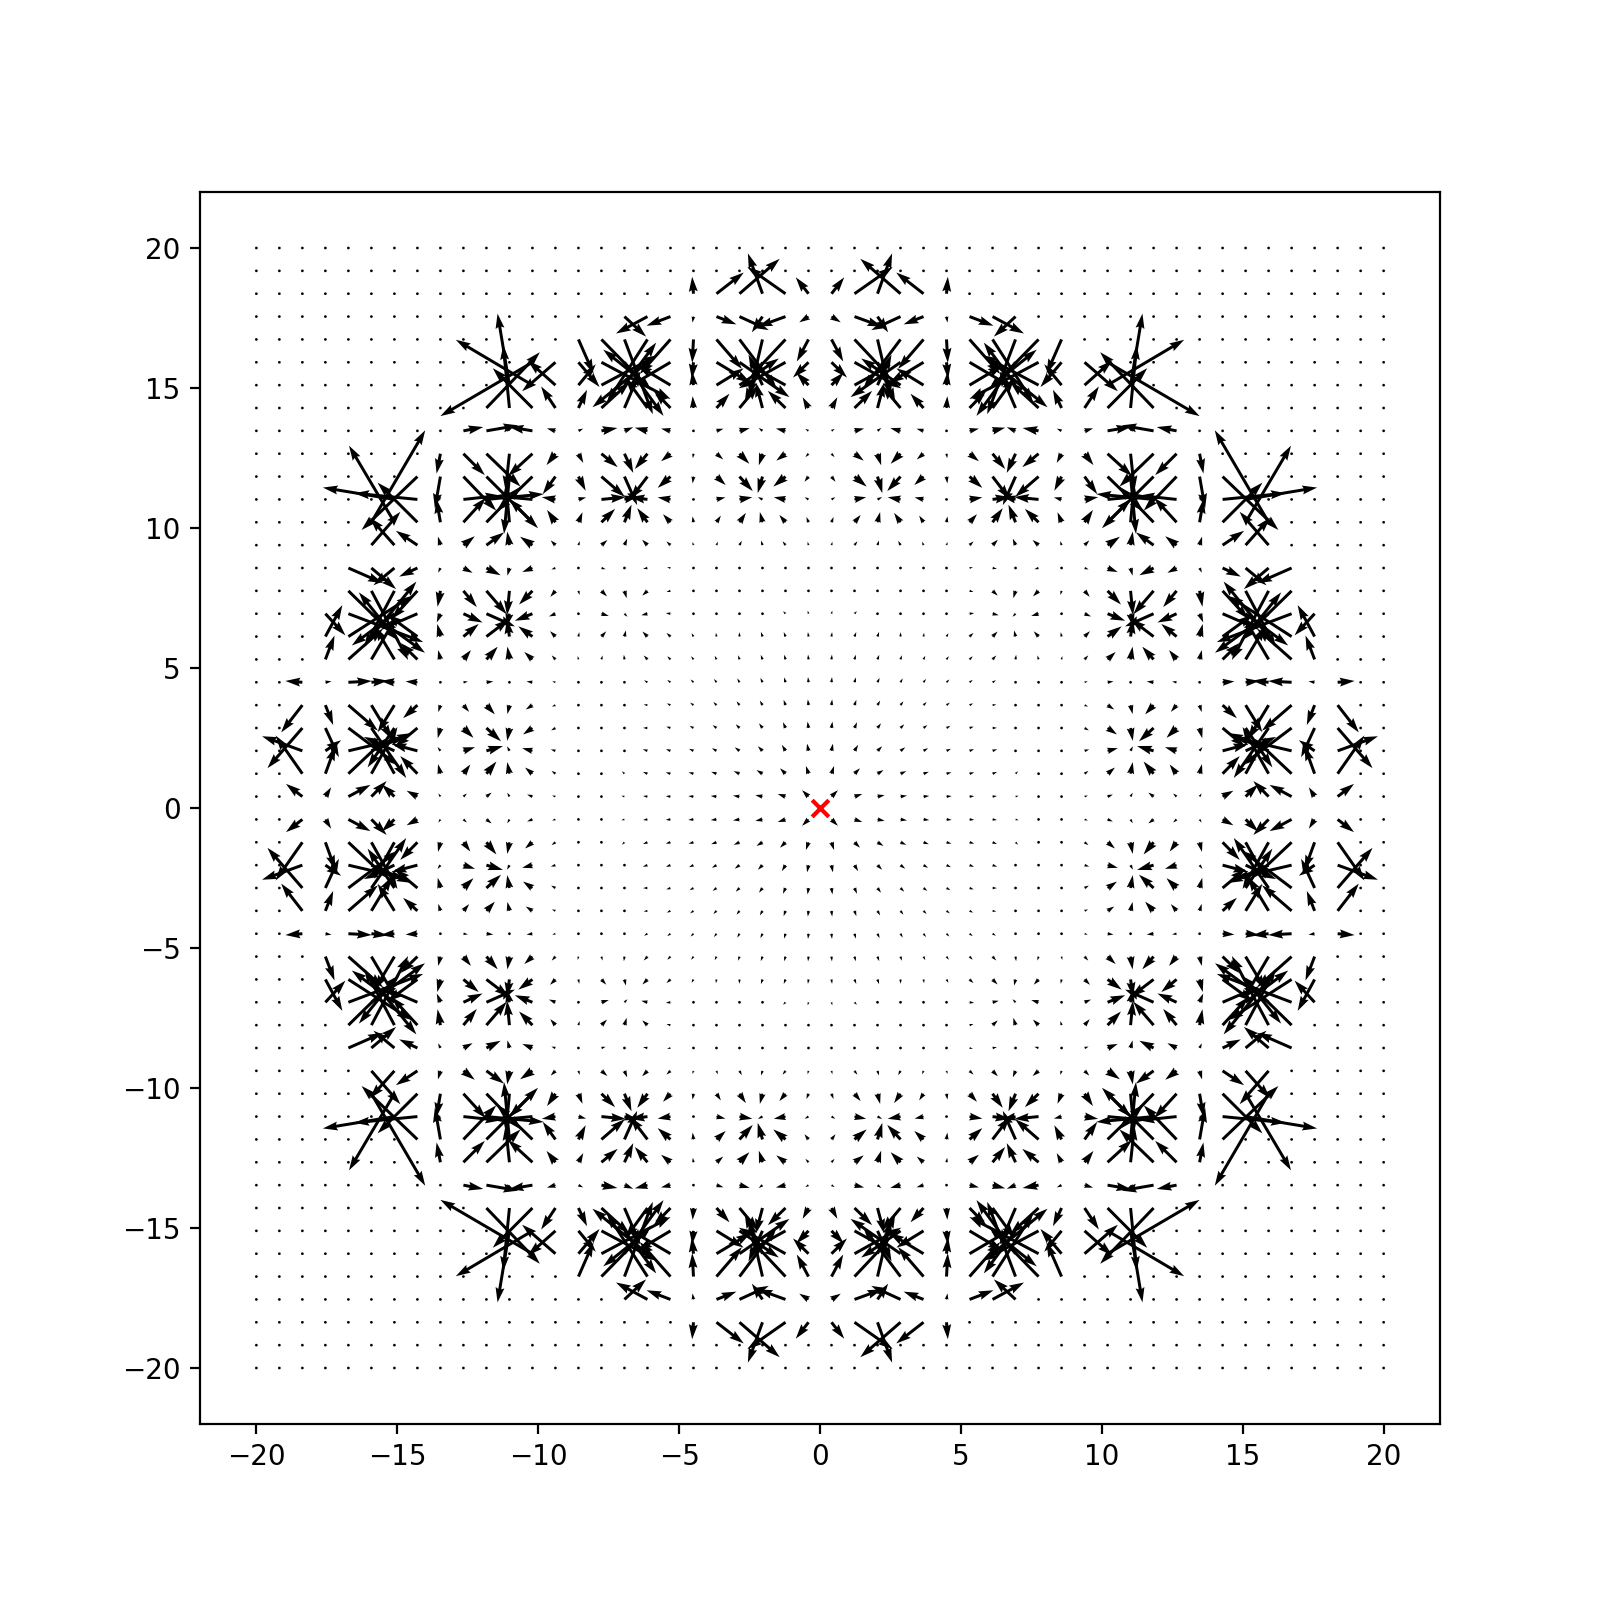

In [67]:
ta.visulise_gradient(lim=20, n=50)

In [ ]:
class single_experiment:
    def set_objective(self, objective_func):
        self.objective_func = objective_func

    def set_optimise(self, optimizer):
        self.optimizer = optimizer

    def do(self):
        optimal, optimum, statistics = self.optimizer.optimise(self.objective_func)
        if np.linalg.norm(optimal - self.objective_func.get_optimal()) < 1e-1 \
        or np.linalg.norm(optimum - self.objective_func.get_optimum()) < 1e-1:
            statistics['status'] = 'global minimum'
        elif statistics['status'] != 'diverge':
            statistics['status'] = 'local minimum'
        print(statistics['status'])
        statistics['trail'] = np.array([x,y])
        self.analyser = post_analysis(statistics, self.objective_func)

#### plot the domain edge of tuned ackley function

In [ ]:
r = 19
angle = np.linspace(0, 2*np.pi, 100)
x = np.cos(angle) * 19
y = np.sin(angle) * 19

### original CMA

In [68]:
np.random.seed(134)

# setup objective function
ta = tuned_ackley()

# setup adjust function optimizer
default = do_nothing()

# setup optmizer
cma = cma_es()
paras = {'mean0':np.array([[19.193], [22.221]]), 'std':np.ones((2,)) * 3, 'tol':1e-5, 'adjust_func':default}
cma.set_parameters(paras)

# boil down to one expreiment
exp1 = single_experiment()
exp1.set_objective(ta)
exp1.set_optimise(cma)
exp1.do()

*******starting optimisation from intitial mean:  [19.193 22.221]
eigenvalue of variance = [0.01843304 0.01993906]
total iterations = 121, total evaluatios = 726
found minimum position = [-1.09920161e-06  9.88591994e-07], found minimum = 2.7182860099017074
global minimum


<IPython.core.display.Javascript object>


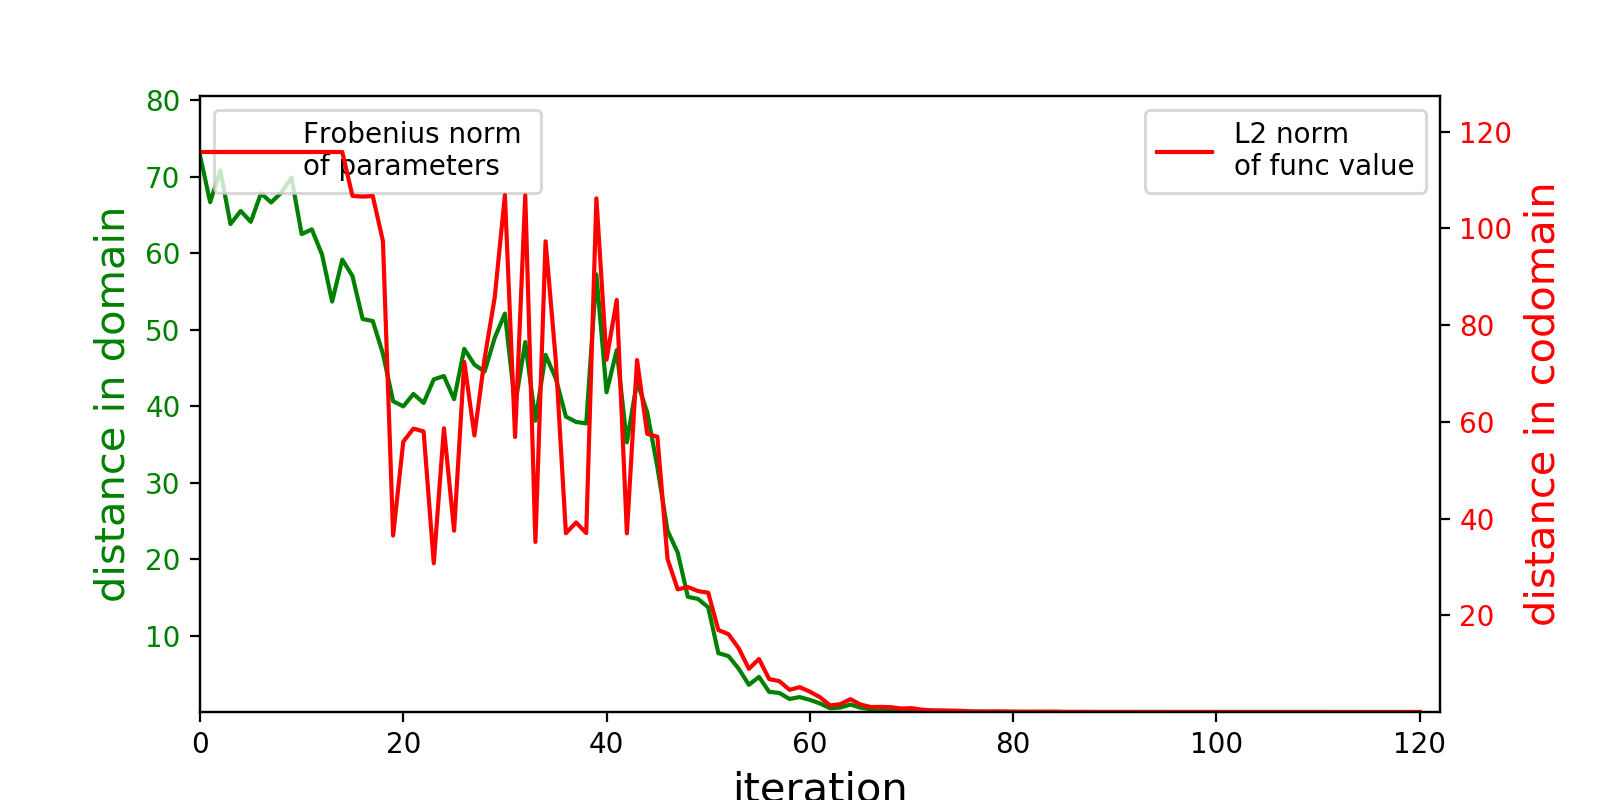

In [71]:
exp1.analyser.plot_distance()

<IPython.core.display.Javascript object>


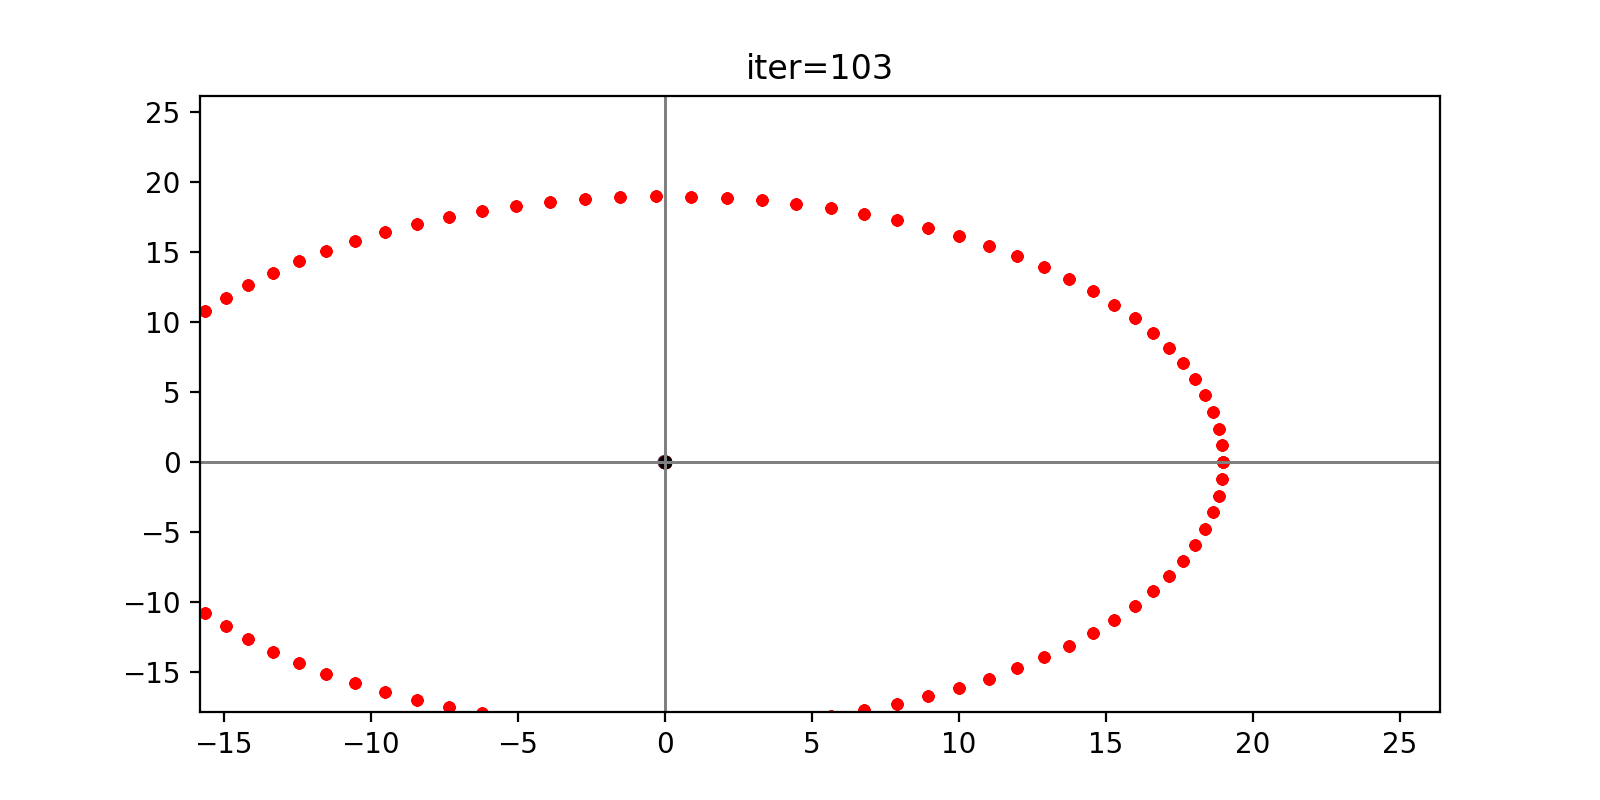

In [69]:
exp1.analyser.animate_moving_cluster()

### line search CMA

In [72]:
np.random.seed(134)

# setup objective function
ta = tuned_ackley()

# setup adjust function optimizer
line = line_search(alpha=1, beta=0.1)

# setup optmizer
cmal = cma_es()
paras = {'mean0':np.array([[19.193], [22.221]]), 'std':np.ones((2,)) * 3, 'tol':1e-5, 'adjust_func':line}
cmal.set_parameters(paras)

# boil down to one expreiment
exp2 = single_experiment()
exp2.set_objective(ta)
exp2.set_optimise(cmal)
exp2.do()

*******starting optimisation from intitial mean:  [19.193 22.221]
eigenvalue of variance = [2.53727965 5.34609041]
total iterations = 28, total evaluatios = 10675
found minimum position = [ 2.09233833e-16 -1.55278836e-18], found minimum = 2.718281828459045
global minimum


<IPython.core.display.Javascript object>


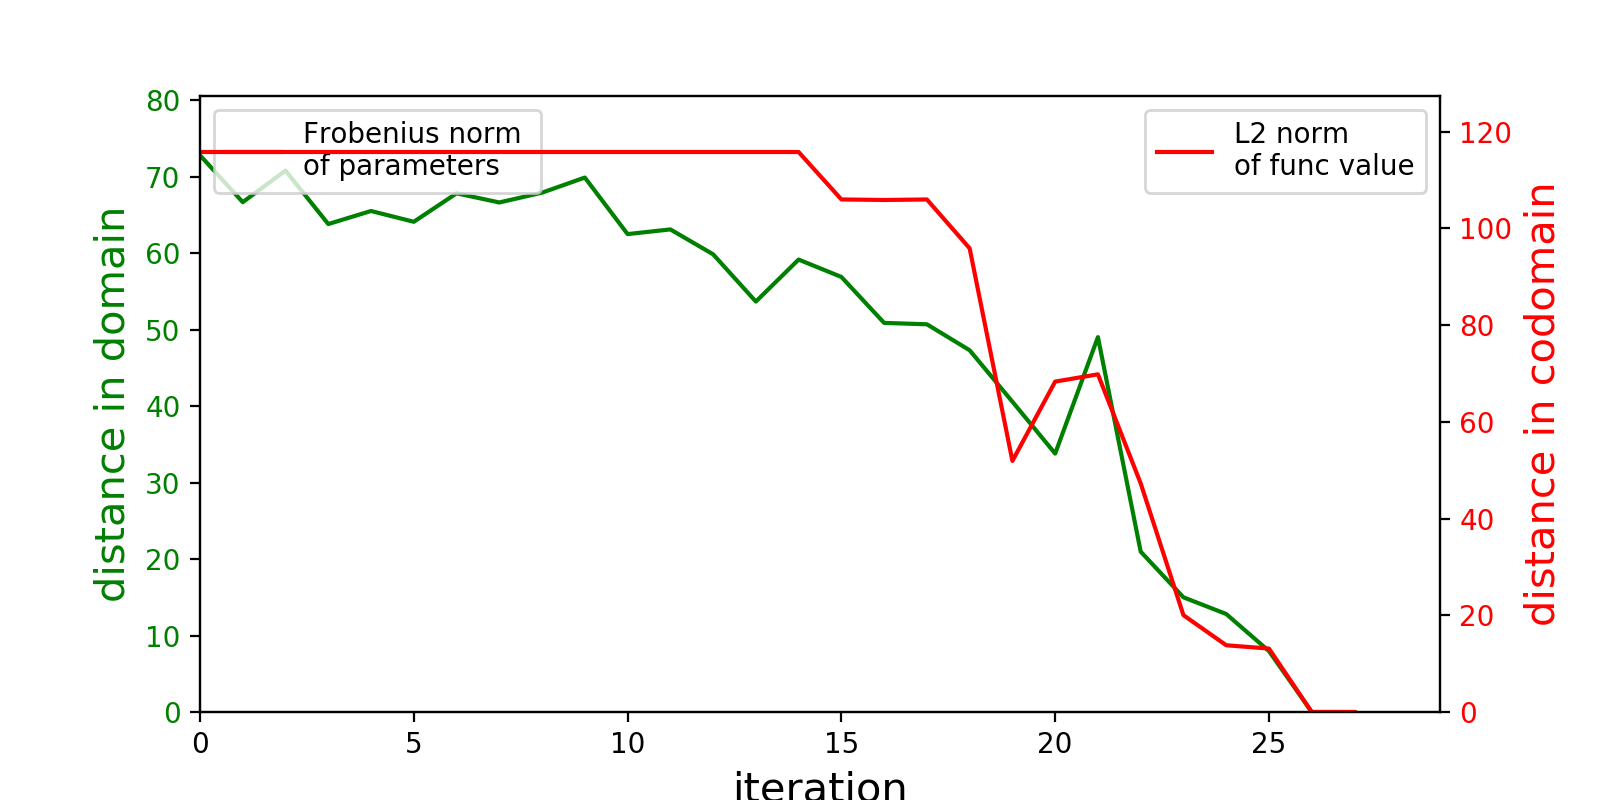

In [73]:
exp2.analyser.plot_distance()

<IPython.core.display.Javascript object>


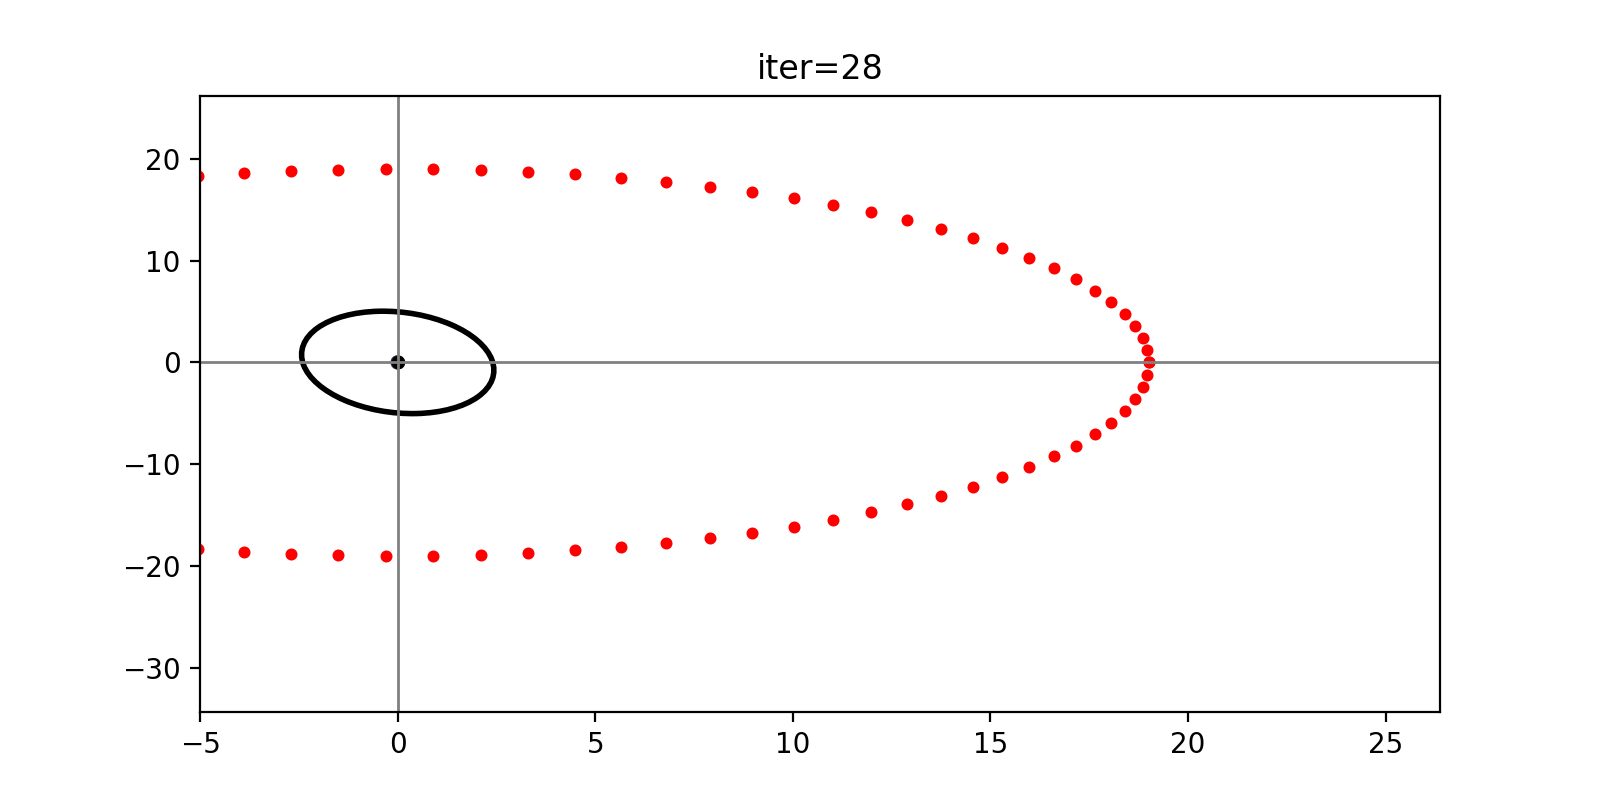

In [74]:
exp2.analyser.animate_moving_cluster()

## egg holder objective
### line search CMA

In [79]:
np.random.seed(134)

# setup objective function
eg = eggholder()

# setup adjust function optimizer
line = line_search(alpha=1, beta=0.1)

# setup optmizer
cmal = cma_es()
paras = {'mean0':np.array([[19.193], [22.221]]), 'std':np.ones((2,)) * 300, 'tol':1e-5, 'adjust_func':line}
cmal.set_parameters(paras)

# boil down to one expreiment
exp3 = single_experiment()
exp3.set_objective(eg)
exp3.set_optimise(cmal)
exp3.do()

*******starting optimisation from intitial mean:  [19.193 22.221]
eigenvalue of variance = [24.18512648 14.9976558 ]
total iterations = 50, total evaluatios = 74976
found minimum position = [-465.69683585  385.71786943], found minimum = -894.5788994101005
local minimum


In [86]:
eg.visualise3d(lim=650, n=100)

In [ ]:
exp3.analyser.plot_distance()

### original CMA

In [87]:
np.random.seed(134)

# setup objective function
eg = eggholder()

# setup adjust function optimizer

# setup optmizer
cmal = cma_es()
paras = {'mean0':np.array([[19.193], [22.221]]), 'std':np.ones((2,)) * 300, 'tol':1e-5, 'adjust_func':default}
cmal.set_parameters(paras)

# boil down to one expreiment
exp4 = single_experiment()
exp4.set_objective(eg)
exp4.set_optimise(cmal)
exp4.do()

*******starting optimisation from intitial mean:  [19.193 22.221]
eigenvalue of variance = [25.13038294 14.62960776]
total iterations = 53, total evaluatios = 318
found minimum position = [-105.88012779  423.15515502], found minimum = -565.9977802679299
local minimum


In [ ]:
exp4.analyser.plot_distance()

## contrast between line search and Adam

In [48]:
ad = adam()
x0 = np.array([[13.193], [12.221]])
paras = {'x0':x0, 'alpha':0.01, 'beta_1':0.9, 'beta_2':0.999, 'epsilon':1e-8, 'max_iter':100000, 'tol':1e-2}
ad.set_parameters(paras)
%time minimum, cnt = ad.optimise(ta)
print("found minimum position:{}, minimum:{}, iteration counts:{}".format(minimum.ravel(), ta.func(minimum), cnt))

CPU times: user 16 ms, sys: 1.89 ms, total: 17.9 ms
Wall time: 17.5 ms
found minimum position:[13.00765239 12.00694419], minimum:[10.41629549], iteration counts:151


In [47]:
line = line_search()
x0 = np.array([[13.193], [12.221]])
paras = {'x0':x0, 'alpha':1, 'beta':0.1, 'max_iter':100, 'tol':1e-2}
line.set_parameters(paras)
%time minimum, cnt = line.optimise(ta)
print("found minimum position:{}, minimum:{}, iteration counts:{}".format(minimum.ravel(), ta.func(minimum), cnt))

CPU times: user 3.05 ms, sys: 1.49 ms, total: 4.55 ms
Wall time: 3.73 ms
found minimum position:[13.00757003 12.00699352], minimum:10.416294876311023, iteration counts:45


In [77]:
np.random.seed(134)

# setup objective function
ta = tuned_ackley()

# setup adjust function optimizer
line = line_search(alpha=1, beta=0.1)

# setup optmizer
cmal = cma_es()
paras = {'mean0':np.array([[13.193], [12.221]]), 'std':np.ones((2,)) * 3, 'tol':1e-5, 'adjust_func':default}
cmal.set_parameters(paras)

# boil down to one expreiment
exp5 = single_experiment()
exp5.set_objective(ta)
exp5.set_optimise(cmal)
exp5.do()

*******starting optimisation from intitial mean:  [13.193 12.221]
eigenvalue of variance = [0.22581479 0.29620172]
total iterations = 71, total evaluatios = 426
found minimum position = [14.00784086 12.00663821], found minimum = 8.6620593227524
local minimum


<IPython.core.display.Javascript object>


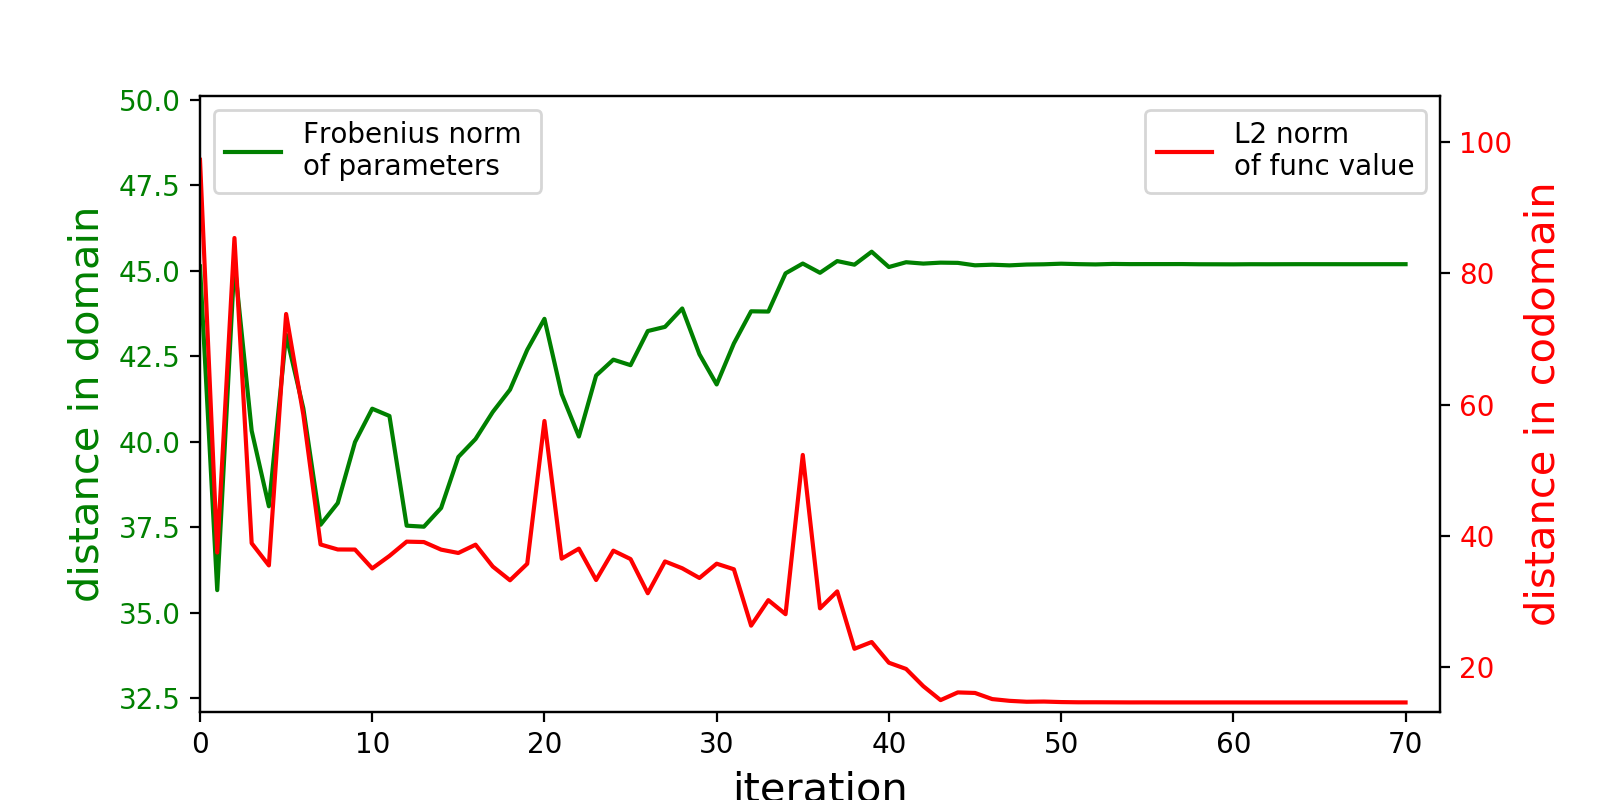

In [88]:
exp5.analyser.plot_distance()

<IPython.core.display.Javascript object>


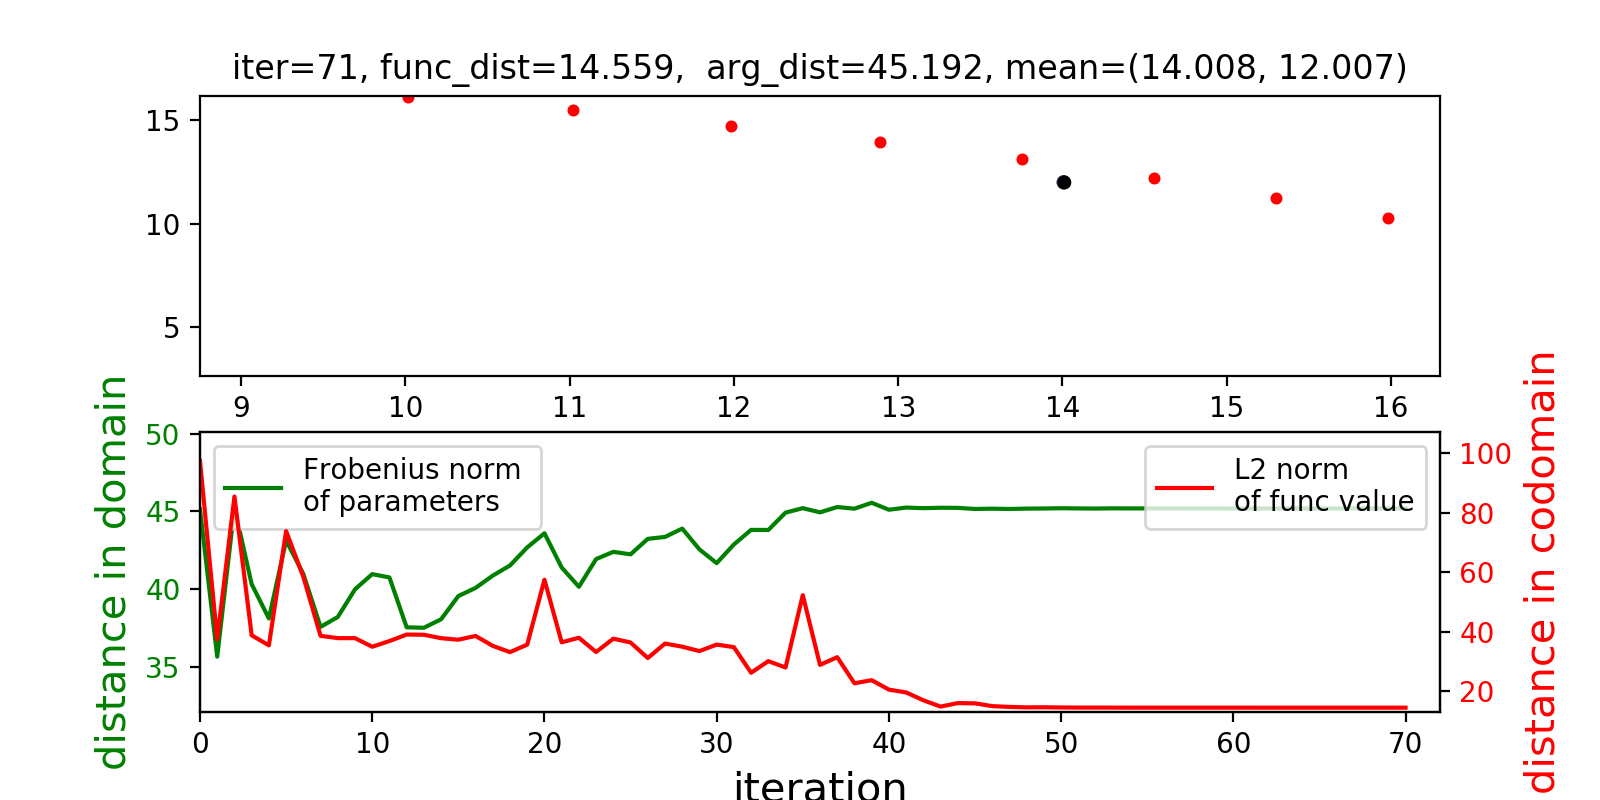

In [78]:
exp5.analyser.animate_scatterplot_distance()